In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import gdown
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rio
import rasterstats
from pprint import pprint
import xarray as xr

import micro
import gtsa

import seaborn as sns 
import statsmodels.api as sm

## $\Delta$ Z eCDF plots
- Do not run plots without clearing all cell output first.

In [3]:
ds_diff_k13_wsyr1_sfm = xr.open_dataset('../data/k13_wsyr1_diff_sfm.nc').squeeze()
ds_diff_k13_dsyr1_sfm = xr.open_dataset('../data/k13_dsyr1_diff_sfm.nc').squeeze()
ds_diff_k13_wsyr2_sfm = xr.open_dataset('../data/k13_wsyr2_diff_sfm.nc').squeeze()

ds_diff_m14_wsyr1_sfm = xr.open_dataset('../data/m14_wsyr1_diff_sfm.nc').squeeze()
ds_diff_m14_dsyr1_sfm = xr.open_dataset('../data/m14_dsyr1_diff_sfm.nc').squeeze()
ds_diff_m14_wsyr2_sfm = xr.open_dataset('../data/m14_wsyr2_diff_sfm.nc').squeeze()

In [4]:
ds_diff_k13_wsyr1_lidar = xr.open_dataset('../data/k13_wsyr1_diff_lidar.nc').squeeze()
ds_diff_k13_dsyr1_lidar = xr.open_dataset('../data/k13_dsyr1_diff_lidar.nc').squeeze()
ds_diff_k13_wsyr2_lidar = xr.open_dataset('../data/k13_wsyr2_diff_lidar.nc').squeeze()

ds_diff_m14_wsyr1_lidar = xr.open_dataset('../data/m14_wsyr1_diff_lidar.nc').squeeze()
ds_diff_m14_dsyr1_lidar = xr.open_dataset('../data/m14_dsyr1_diff_lidar.nc').squeeze()
ds_diff_m14_wsyr2_lidar = xr.open_dataset('../data/m14_wsyr2_diff_lidar.nc').squeeze()

In [5]:
ds_diff_k13_wsyr1_sfm_2 = ds_diff_k13_wsyr1_sfm.isel(time=2).to_dataframe()
ds_diff_k13_wsyr1_sfm_2.reset_index(inplace=True)
ds_diff_k13_wsyr1_sfm_2.dropna(inplace=True)
ds_diff_k13_wsyr1_sfm_2.drop(axis=1, labels=['time','spatial_ref'], inplace=True)

ds_diff_k13_wsyr1_sfm_3 = ds_diff_k13_wsyr1_sfm.isel(time=3).to_dataframe()
ds_diff_k13_wsyr1_sfm_3.reset_index(inplace=True)
ds_diff_k13_wsyr1_sfm_3.dropna(inplace=True)
ds_diff_k13_wsyr1_sfm_3.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_wsyr1_sfm_4 = ds_diff_k13_wsyr1_sfm.isel(time=5).to_dataframe()
ds_diff_k13_wsyr1_sfm_4.reset_index(inplace=True)
ds_diff_k13_wsyr1_sfm_4.dropna(inplace=True)
ds_diff_k13_wsyr1_sfm_4.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_wsyr1_lidar_4 = ds_diff_k13_wsyr1_lidar.isel(time=4).to_dataframe()
ds_diff_k13_wsyr1_lidar_4.reset_index(inplace=True)
ds_diff_k13_wsyr1_lidar_4.dropna(inplace=True)
ds_diff_k13_wsyr1_lidar_4.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

In [6]:
ds_diff_k13_dsyr1_sfm_2 = ds_diff_k13_dsyr1_sfm.isel(time=2).to_dataframe()
ds_diff_k13_dsyr1_sfm_2.reset_index(inplace=True)
ds_diff_k13_dsyr1_sfm_2.dropna(inplace=True)
ds_diff_k13_dsyr1_sfm_2.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_dsyr1_sfm_3 = ds_diff_k13_dsyr1_sfm.isel(time=4).to_dataframe()
ds_diff_k13_dsyr1_sfm_3.reset_index(inplace=True)
ds_diff_k13_dsyr1_sfm_3.dropna(inplace=True)
ds_diff_k13_dsyr1_sfm_3.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_dsyr1_lidar_3 = ds_diff_k13_dsyr1_lidar.isel(time=3).to_dataframe()
ds_diff_k13_dsyr1_lidar_3.reset_index(inplace=True)
ds_diff_k13_dsyr1_lidar_3.dropna(inplace=True)
ds_diff_k13_dsyr1_lidar_3.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

In [7]:
ds_diff_k13_wsyr2_sfm_2 = ds_diff_k13_wsyr2_sfm.isel(time=2).to_dataframe()
ds_diff_k13_wsyr2_sfm_2.reset_index(inplace=True)
ds_diff_k13_wsyr2_sfm_2.dropna(inplace=True)
ds_diff_k13_wsyr2_sfm_2.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_wsyr2_sfm_3 = ds_diff_k13_wsyr2_sfm.isel(time=3).to_dataframe()
ds_diff_k13_wsyr2_sfm_3.reset_index(inplace=True)
ds_diff_k13_wsyr2_sfm_3.dropna(inplace=True)
ds_diff_k13_wsyr2_sfm_3.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_wsyr2_sfm_4 = ds_diff_k13_wsyr2_sfm.isel(time=5).to_dataframe()
ds_diff_k13_wsyr2_sfm_4.reset_index(inplace=True)
ds_diff_k13_wsyr2_sfm_4.dropna(inplace=True)
ds_diff_k13_wsyr2_sfm_4.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

ds_diff_k13_wsyr2_lidar_4 = ds_diff_k13_wsyr2_lidar.isel(time=4).to_dataframe()
ds_diff_k13_wsyr2_lidar_4.reset_index(inplace=True)
ds_diff_k13_wsyr2_lidar_4.dropna(inplace=True)
ds_diff_k13_wsyr2_lidar_4.drop(axis=1, labels=['time','spatial_ref'],inplace=True)

In [8]:
ds_diff_m14_wsyr1_sfm_2 = ds_diff_m14_wsyr1_sfm.isel(time=2).to_dataframe()
ds_diff_m14_wsyr1_sfm_2.reset_index(inplace=True)
ds_diff_m14_wsyr1_sfm_2.dropna(inplace=True)
ds_diff_m14_wsyr1_sfm_2.drop(columns=['time','spatial_ref'], inplace=True)

In [9]:
ds_diff_m14_dsyr1_sfm_2 = ds_diff_m14_dsyr1_sfm.isel(time=3).to_dataframe()
ds_diff_m14_dsyr1_sfm_2.reset_index(inplace=True)
ds_diff_m14_dsyr1_sfm_2.dropna(inplace=True)
ds_diff_m14_dsyr1_sfm_2.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_dsyr1_lidar_2 = ds_diff_m14_dsyr1_lidar.isel(time=2).to_dataframe()
ds_diff_m14_dsyr1_lidar_2.reset_index(inplace=True)
ds_diff_m14_dsyr1_lidar_2.dropna(inplace=True)
ds_diff_m14_dsyr1_lidar_2.drop(columns=['time','spatial_ref'], inplace=True)

In [10]:
ds_diff_m14_wsyr2_sfm_2 = ds_diff_m14_wsyr2_sfm.isel(time=2).to_dataframe()
ds_diff_m14_wsyr2_sfm_2.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_2.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_2.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_sfm_3 = ds_diff_m14_wsyr2_sfm.isel(time=3).to_dataframe()
ds_diff_m14_wsyr2_sfm_3.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_3.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_3.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_sfm_4 = ds_diff_m14_wsyr2_sfm.isel(time=4).to_dataframe()
ds_diff_m14_wsyr2_sfm_4.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_4.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_4.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_sfm_5 = ds_diff_m14_wsyr2_sfm.isel(time=5).to_dataframe()
ds_diff_m14_wsyr2_sfm_5.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_5.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_5.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_sfm_6 = ds_diff_m14_wsyr2_sfm.isel(time=7).to_dataframe()
ds_diff_m14_wsyr2_sfm_6.reset_index(inplace=True)
ds_diff_m14_wsyr2_sfm_6.dropna(inplace=True)
ds_diff_m14_wsyr2_sfm_6.drop(columns=['time','spatial_ref'], inplace=True)

ds_diff_m14_wsyr2_lidar_6 = ds_diff_m14_wsyr2_lidar.isel(time=6).to_dataframe()
ds_diff_m14_wsyr2_lidar_6.reset_index(inplace=True)
ds_diff_m14_wsyr2_lidar_6.dropna(inplace=True)
ds_diff_m14_wsyr2_lidar_6.drop(columns=['time','spatial_ref'], inplace=True)

In [11]:
k13_wsyr1_5per_1 = np.percentile(ds_diff_k13_wsyr1_sfm_2['band1'],5)
k13_wsyr1_5per_2 = np.percentile(ds_diff_k13_wsyr1_sfm_3['band1'],5)
k13_wsyr1_5per_3 = np.percentile(ds_diff_k13_wsyr1_sfm_4['band1'],5)
k13_wsyr1_lidar = np.percentile(ds_diff_k13_wsyr1_lidar_4['band1'],5)

k13_dsyr1_5per_1 = np.percentile(ds_diff_k13_dsyr1_sfm_2['band1'],5)
k13_dsyr1_5per_2 = np.percentile(ds_diff_k13_dsyr1_sfm_3['band1'],5)
k13_dsyr1_lidar = np.percentile(ds_diff_k13_dsyr1_lidar_3['band1'],5)


k13_wsyr2_5per_1 = np.percentile(ds_diff_k13_wsyr2_sfm_2['band1'],5)
k13_wsyr2_5per_2 = np.percentile(ds_diff_k13_wsyr2_sfm_3['band1'],5)
k13_wsyr2_5per_3 = np.percentile(ds_diff_k13_wsyr2_sfm_4['band1'],5)
k13_wsyr2_lidar = np.percentile(ds_diff_k13_wsyr2_lidar_4['band1'],5)

k13_5per1 = [0.0,k13_wsyr1_5per_1,k13_wsyr1_5per_2,k13_wsyr1_5per_3]
np.savetxt("/home/adalvis/github/micro_diff/k13_5per1.csv", k13_5per1, delimiter=",", fmt='%f')
k13_5per2 = [0.0,k13_dsyr1_5per_1,k13_dsyr1_5per_2]
np.savetxt("/home/adalvis/github/micro_diff/k13_5per2.csv", k13_5per2, delimiter=",", fmt='%f')
k13_5per3 = [0.0,k13_wsyr2_5per_1,k13_wsyr2_5per_2,k13_wsyr2_5per_3]
np.savetxt("/home/adalvis/github/micro_diff/k13_5per3.csv", k13_5per3, delimiter=",", fmt='%f')
k13_lidar1 = [k13_wsyr1_lidar]
np.savetxt("/home/adalvis/github/micro_diff/k13_lidar1.csv", k13_lidar1, delimiter=",", fmt='%f')
k13_lidar2 = [k13_dsyr1_lidar]
np.savetxt("/home/adalvis/github/micro_diff/k13_lidar2.csv", k13_lidar2, delimiter=",", fmt='%f')
k13_lidar3 = [k13_wsyr2_lidar]
np.savetxt("/home/adalvis/github/micro_diff/k13_lidar3.csv", k13_lidar3, delimiter=",", fmt='%f')

k13_time1 = [0, 3, 5, 6]
k13_time2 = [0, 2.5, 3.5]
k13_time3 = [0, 4, 7, 8]
k13_lt1 = [6]
k13_lt2 = [3.5]
k13_lt3 = [8]


m14_wsyr1_5per_1 = np.percentile(ds_diff_m14_wsyr1_sfm_2['band1'],5)

m14_dsyr1_5per_1 = np.percentile(ds_diff_m14_dsyr1_sfm_2['band1'],5)
m14_dsyr1_lidar = np.percentile(ds_diff_m14_dsyr1_lidar_2['band1'],5)

m14_wsyr2_5per_1 = np.percentile(ds_diff_m14_wsyr2_sfm_2['band1'],5)
m14_wsyr2_5per_2 = np.percentile(ds_diff_m14_wsyr2_sfm_3['band1'],5)
m14_wsyr2_5per_3 = np.percentile(ds_diff_m14_wsyr2_sfm_4['band1'],5)
m14_wsyr2_5per_4 = np.percentile(ds_diff_m14_wsyr2_sfm_5['band1'],5)
m14_wsyr2_5per_5 = np.percentile(ds_diff_m14_wsyr2_sfm_6['band1'],5)
m14_wsyr2_lidar = np.percentile(ds_diff_m14_wsyr2_lidar_6['band1'],5)


m14_5per1 = [0.0,m14_wsyr1_5per_1]
np.savetxt("/home/adalvis/github/micro_diff/m14_5per1.csv", m14_5per1, delimiter=",", fmt='%f')
m14_5per2 = [0.0,m14_dsyr1_5per_1]
np.savetxt("/home/adalvis/github/micro_diff/m14_5per2.csv", m14_5per2, delimiter=",", fmt='%f')
m14_5per3 = [0.0,m14_wsyr2_5per_1,m14_wsyr2_5per_2,m14_wsyr2_5per_3,\
    m14_wsyr2_5per_4,m14_wsyr2_5per_5]
np.savetxt("/home/adalvis/github/micro_diff/m14_5per3.csv", m14_5per3, delimiter=",", fmt='%f')

m14_lidar2 = [m14_dsyr1_lidar]
np.savetxt("/home/adalvis/github/micro_diff/m14_lidar2.csv", m14_lidar2, delimiter=",", fmt='%f')
m14_lidar3 = [m14_wsyr2_lidar]
np.savetxt("/home/adalvis/github/micro_diff/m14_lidar3.csv", m14_lidar3, delimiter=",", fmt='%f')

m14_time1 = [0, 2.5]
m14_time2 = [0, 3.5]
m14_time3 = [0, 0.25,0.5,1,1.75,3]

m14_lt2 = [3.5]
m14_lt3 = [3]

In [12]:
np.multiply(k13_5per1,100)

array([ 0.        , -1.74862701, -2.66628231, -2.63243666])

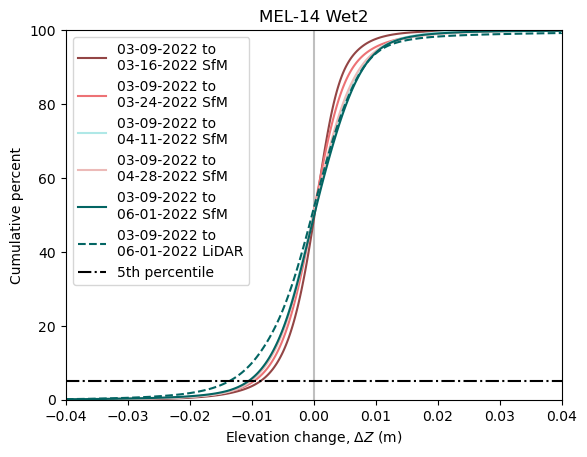

In [13]:
fig, ax = plt.subplots()

ax.plot([0,0],[0,100], '-', color='gray', alpha=0.5)
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_2, x='band1', stat='percent', ax=ax, color='#934545', label='03-09-2022 to\n03-16-2022 SfM')
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_3, x='band1', stat='percent', ax=ax, color='#ED7275', label='03-09-2022 to\n03-24-2022 SfM')
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_4, x='band1', stat='percent', ax=ax, color='#AFE8E7', label='03-09-2022 to\n04-11-2022 SfM')
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_5, x='band1', stat='percent', ax=ax, color='#ECBAB8', label='03-09-2022 to\n04-28-2022 SfM')
sns.ecdfplot(ds_diff_m14_wsyr2_sfm_6, x='band1', stat='percent', ax=ax, color='#036563', label='03-09-2022 to\n06-01-2022 SfM')
sns.ecdfplot(ds_diff_m14_wsyr2_lidar_6, x='band1', stat='percent', ax=ax, linestyle='--', color='#036563', label='03-09-2022 to\n06-01-2022 LiDAR')
ax.plot([-0.04,0.04],[5,5], '-.', color='black', label='5th percentile')
ax.set_xlim(-0.04,0.04)
ax.set_ylim(0,100)
ax.set_xlabel(r'Elevation change, $\Delta Z$ (m)')
ax.set_ylabel('Cumulative percent')
ax.legend(loc='upper left')
ax.set_title('MEL-14 Wet2')
plt.savefig('/mnt/c/Users/Amanda/OneDrive - UW/Dissertation Writing/Chapters/Ch4_mt/Fig7.png', dpi=600, bbox_inches='tight')
plt.show()

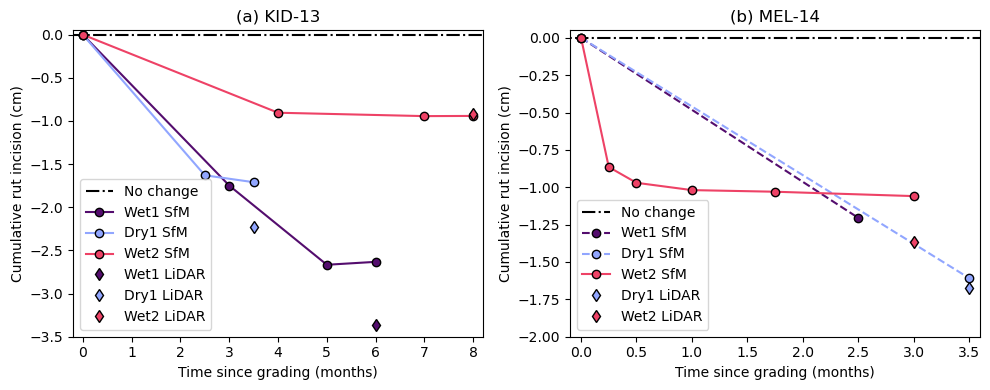

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10,4), layout='tight')
ax[0].plot([-0.25,8.25],[0,0], 'k-.', label='No change')
ax[0].plot(k13_time1, np.multiply(k13_5per1, 100), 'o-', color='#540D6E', markeredgecolor='k', label='Wet1 SfM')
ax[0].plot(k13_time2, np.multiply(k13_5per2, 100), 'o-', color='#91A6FF', markeredgecolor='k', label='Dry1 SfM')
ax[0].plot(k13_time3, np.multiply(k13_5per3, 100), 'o-', color='#EE4266', markeredgecolor='k', label='Wet2 SfM')
ax[0].plot(k13_lt1, np.multiply(k13_lidar1, 100), 'd', markersize=6, color='#540D6E', markeredgecolor='k', label='Wet1 LiDAR')
ax[0].plot(k13_lt2, np.multiply(k13_lidar2, 100), 'd', markersize=6, color='#91A6FF', markeredgecolor='k', label='Dry1 LiDAR')
ax[0].plot(k13_lt3, np.multiply(k13_lidar3, 100), 'd', markersize=6, color='#EE4266', markeredgecolor='k', label='Wet2 LiDAR')
ax[0].set(xlabel='Time since grading (months)',ylabel=r'Cumulative rut incision (cm)',\
    xlim=(-0.2,8.2),ylim=(-3.50,0.05))
ax[0].set_title('(a) KID-13')
ax[0].legend(ncol=1)

ax[1].plot([-0.25,3.75], [0,0],'-.', color='k', label='No change')
ax[1].plot(m14_time1, np.multiply(m14_5per1, 100), 'o--', color='#540D6E', markeredgecolor='k', label='Wet1 SfM')
ax[1].plot(m14_time2, np.multiply(m14_5per2, 100), 'o--', color='#91A6FF', markeredgecolor='k', label='Dry1 SfM')
ax[1].plot(m14_time3, np.multiply(m14_5per3, 100), 'o-', color='#EE4266', markeredgecolor='k', label='Wet2 SfM')
ax[1].plot(m14_lt2, np.multiply(m14_lidar2, 100), 'd', markersize=6, color='#91A6FF', markeredgecolor='k', label='Dry1 LiDAR')
ax[1].plot(m14_lt3, np.multiply(m14_lidar3, 100), 'd', markersize=6, color='#EE4266', markeredgecolor='k', label='Wet2 LiDAR')
ax[1].set(xlabel='Time since grading (months)',ylabel=r'Cumulative rut incision (cm)',\
    xlim=(-0.1,3.6), ylim=(-2,0.05))
ax[1].legend(ncol=1)
ax[1].set_title('(b) MEL-14')
plt.savefig('/mnt/c/Users/Amanda/OneDrive - UW/Dissertation Writing/Chapters/Ch4_mt/Fig9_.png', dpi=600, bbox_inches='tight')
plt.show()

In [15]:
m14_5per2

[0.0, -0.016069291129311682]

In [16]:
# fig, ax = plt.subplots()

# sns.ecdfplot(ds_diff_k13_wsyr1_sfm_2, x='band1', stat='percent', ax=ax, color='#a4133c', label='11-09-2020 to 02-08-2021')
# sns.ecdfplot(ds_diff_k13_wsyr1_sfm_3, x='band1', stat='percent', ax=ax, color='#800f2f', label='11-09-2020 to 04-06-2021')
# sns.ecdfplot(ds_diff_k13_wsyr1_sfm_4, x='band1', stat='percent', ax=ax, color='#590d22', label='11-09-2020 to 05-13-2021')
# ax.plot([0,0],[0,100], 'k--')
# ax.set_xlim(-0.04,0.04)
# ax.set_ylim(0,100)
# ax.set_xlabel(r'$\Delta$ Z (meters)')
# ax.legend()
# ax.set_title('KID-13 Wet1')

# plt.show()

In [17]:
# fig, ax = plt.subplots()

# sns.ecdfplot(ds_diff_k13_dsyr1_sfm_2, x='band1', stat='percent', ax=ax, color='#0077b6', label='06-04-2021 to 08-19-2021')
# sns.ecdfplot(ds_diff_k13_dsyr1_sfm_3, x='band1', stat='percent', ax=ax, color='#03045e', label='06-04-2021 to 09-13-2021')
# ax.plot([0,0],[0,100], 'k--')
# ax.set_xlim(-0.04,0.04)
# ax.set_ylim(0,100)
# ax.set_xlabel(r'$\Delta$ Z (meters)')
# ax.legend()
# ax.set_title('KID-13 Dry1')

# plt.show()

In [18]:
# fig, ax = plt.subplots()

# sns.ecdfplot(ds_diff_k13_wsyr2_sfm_2, x='band1', stat='percent', ax=ax, color='#9f86c0', label='10-07-2021 to 02-08-2022')
# sns.ecdfplot(ds_diff_k13_wsyr2_sfm_3, x='band1', stat='percent', ax=ax, color='#5e548e', label='10-07-2021 to 05-03-2022')
# sns.ecdfplot(ds_diff_k13_wsyr2_sfm_4, x='band1', stat='percent', ax=ax, color='#231942', label='10-07-2021 to 05-31-2022')
# ax.plot([0,0],[0,100], 'k--')
# ax.set_xlim(-0.04,0.04)
# ax.set_ylim(0,100)
# ax.set_xlabel(r'$\Delta$ Z (meters)')
# ax.legend()
# ax.set_title('KID-13 Wet2')

# plt.show()

In [19]:
# fig, ax = plt.subplots()

# sns.ecdfplot(ds_diff_m14_wsyr1_sfm_2, x='band1', stat='percent', ax=ax, color='#a4133c', label='12-03-2020 to 02-24-2021')
# ax.plot([0,0],[0,100], 'k--')
# ax.set_xlim(-0.04,0.04)
# ax.set_ylim(0,100)
# ax.set_xlabel(r'$\Delta$ Z (meters)')
# ax.legend()
# ax.set_title('MEL-14 Wet1')

# plt.show()

In [20]:
# fig, ax = plt.subplots()

# sns.ecdfplot(ds_diff_m14_dsyr1_sfm_2, x='band1', stat='percent', ax=ax, color='#0077b6', label='06-03-2021 to 09-14-2021')
# ax.plot([0,0],[0,100], 'k--')
# ax.set_xlim(-0.04,0.04)
# ax.set_ylim(0,100)
# ax.set_xlabel(r'$\Delta$ Z (meters)')
# ax.legend()
# ax.set_title('MEL-14 Dry1')

# plt.show()